In [0]:
import tensorflow as tf
import tensornets as nets

In [6]:
!pip install tensornets


  Using cached https://files.pythonhosted.org/packages/1c/89/0e3b4ee23371ee66aa07c575ca2e7b64eb7ecf751a9d579b78a8cee314b1/tensornets-0.3.6.tar.gz
  Running setup.py bdist_wheel for tensornets ... - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/12/56/86/d29c1f3743caf453be8f1b9615f170a12d22e8bbf200c19a36
Successfully built tensornets


In [5]:
!pip  install Cython

    100% |████████████████████████████████| 2.1MB 13.2MB/s 


In [0]:
inputs=tf.placeholder(tf.float32, shape=[None,224,224,3])
outputs=tf.placeholder(tf.float32, shape=[None,6])


In [0]:
logits=nets.VGG19(inputs, is_training=True, classes=6)
model=tf.identity(logits)

loss=tf.losses.softmax_cross_entropy(outputs, logits)
train= tf.train.AdamOptimizer(1e-5).minimize(loss)

correct_pred=tf.equal(tf.argmax(model,1), tf.argmax(outputs,1))
accuracy=tf.reduce_mean(tf.cast(correct_pred,tf.float32))

In [0]:
with tf.Session() as sess:
   sess.run(tf.global_variables_initializer())
   sess.run(logits.pretrained())

In [15]:
!pip install scikit-image

In [16]:
from google.colab import files
uploaded=files.upload()

Saving test_signs.h5 to test_signs.h5
Saving train_signs.h5 to train_signs.h5


In [0]:
import h5py
import numpy as np
def load_dataset():
    train_dataset = h5py.File('train_signs.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_signs.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

  
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()  

(1080, 64, 64, 3)

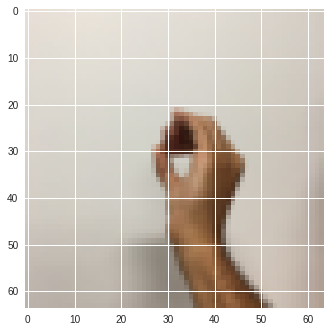

In [36]:
import matplotlib.pyplot as plt
index=1
plt.imshow(X_test_orig[index])
X_train_orig.shape


In [0]:
import skimage.transform

new_X_train_orig = []

for image in X_train_orig:
  newImage = skimage.transform.resize(image, (224, 224), mode='constant')
  new_X_train_orig.append(newImage)


new_X_test_orig = []

for image in X_test_orig:
  newImage = skimage.transform.resize(image, (224, 224), mode='constant')
  new_X_test_orig.append(newImage)

(224, 224, 3)

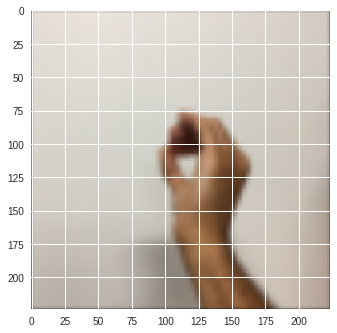

In [54]:
index=1
plt.imshow(new_X_test_orig[index])
new_X_train_orig[index].shape

In [0]:
new_X_train_orig = np.array(new_X_train_orig)
new_X_test_orig=np.array(new_X_test_orig)

In [40]:
print (new_X_test_orig.shape)
new_X_train_orig.shape

(120, 224, 224, 3)


(1080, 224, 224, 3)

In [0]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y

In [0]:
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

In [43]:
print (Y_train.shape)
Y_test.shape

(1080, 6)


(120, 6)

In [0]:
def batch_features_labels(features, labels, batch_size):
    """
    Split features and labels into batches
    """
    for start in range(0, len(features), batch_size):
        end = min(start + batch_size, len(features))
        yield features[start:end], labels[start:end]


In [53]:
total_valid_acc = 0

for batch_valid_images, batch_valid_labels in batch_features_labels(new_X_train_orig, Y_train, 64):
    total_valid_acc += sess.run(accuracy, {inputs:batch_valid_images, outputs:batch_valid_labels})

total_num_batch = valid_images.shape[0]/batch_size

print('Validation Accuracy: {:.6f}'.format(total_valid_acc/total_num_batch))

RuntimeError: ignored

In [58]:
with tf.Session() as sess:
   sess.run(tf.global_variables_initializer())
   sess.run(logits.pretrained())
   total_valid_acc = 0

   for batch_valid_images, batch_valid_labels in batch_features_labels(new_X_train_orig, Y_train, 64):
    acc = sess.run(accuracy, {inputs:batch_valid_images, outputs:batch_valid_labels})
    total_valid_acc=total_valid_acc+acc
    print (acc)

   total_num_batch = new_X_train_orig.shape[0]/64

   print('Validation Accuracy: {:.6f}'.format(total_valid_acc/total_num_batch))
  

0.109375
0.140625
0.234375
0.109375
0.140625
0.140625
0.171875
0.1875
0.125
0.140625
0.140625
0.171875
0.1875
0.09375
0.15625
0.140625
0.21428572
Validation Accuracy: 0.154365


In [61]:
with tf.Session() as sess:
   sess.run(tf.global_variables_initializer())
   sess.run(logits.pretrained())
   total_num_batch = new_X_train_orig.shape[0]/64
   
   for epoch in range(100):
      total_cost=0
      total_valid_acc = 0
      for batch_valid_images, batch_valid_labels in batch_features_labels(new_X_train_orig, Y_train, 64):
        
        acc,cost = sess.run([accuracy,loss], {inputs:batch_valid_images, outputs:batch_valid_labels})
        total_valid_acc=total_valid_acc+acc
        total_cost=total_cost+cost
      
      if epoch%2==0:
        print ("Cost after epoch %i: %f" % (epoch, total_cost))
        print ("Accuracy after epoch %i: %f" % (epoch, total_valid_acc/total_num_batch))
      

   

   #print('Validation Accuracy: {:.6f}'.format(total_valid_acc/total_num_batch))

Cost after epoch 0: 30.757435
Accuracy after epoch 0: 0.154233
Cost after epoch 2: 30.655905
Accuracy after epoch 2: 0.167063
Cost after epoch 4: 30.741207
Accuracy after epoch 4: 0.173810
Cost after epoch 6: 30.869916
Accuracy after epoch 6: 0.157672
Cost after epoch 8: 30.606367
Accuracy after epoch 8: 0.184392
Cost after epoch 10: 30.623772
Accuracy after epoch 10: 0.178307
Cost after epoch 12: 30.704653
Accuracy after epoch 12: 0.164418
Cost after epoch 14: 30.697202
Accuracy after epoch 14: 0.178571


KeyboardInterrupt: ignored

In [62]:
! git clone https://github.com/ayush093/tensorflow.git
  

Cloning into 'tensorflow'...
remote: Enumerating objects: 13, done.
remote: Total 13 (delta 0), reused 0 (delta 0), pack-reused 13
Unpacking objects: 100% (13/13), done.


In [63]:
!pwd

/content


In [64]:
!ls

sample_data  tensorflow  test_signs.h5	train_signs.h5
